# Introducción

En la industria de los videojuegos, entender las tendencias de ventas y preferencias de los consumidores es fundamental para la toma de decisiones estratégicas. Este proyecto tiene como objetivo analizar un conjunto de datos histórico de ventas de videojuegos, con el fin de identificar patrones de comportamiento del mercado, evaluar el impacto de diferentes plataformas y géneros, y explorar la relación entre las valoraciones de críticos y usuarios con el éxito comercial de los títulos.

El análisis se estructura en tres etapas principales:

Preparación y limpieza de los datos, donde se abordaron valores ausentes y se normalizaron formatos para garantizar la calidad del conjunto de datos.

Análisis exploratorio, que incluye la evolución temporal de lanzamientos, ventas por plataforma y región, y la influencia de géneros y calificaciones.

Extracción de insights clave, que permitirán orientar estrategias de marketing y desarrollo en la industria.

Entre los hallazgos preliminares, se observa un marcado crecimiento en el número de lanzamientos anuales hasta su punto máximo alrededor del año 2008, seguido de un declive progresivo. Plataformas como PS2, X360 y Wii lideran en ventas globales, mientras que géneros como Acción, Deportes y Shooter demuestran un desempeño comercial consistente.

Este estudio no solo busca responder preguntas específicas sobre el mercado, sino también sentar las bases para futuros análisis predictivos y estrategias basadas en datos.

### Carga de librerías y descripción de los datos

In [ ]:
#Libreria 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st 
import seaborn as sns

In [ ]:
df= pd.read_csv("/datasets/games.csv")

In [ ]:
#df= pd.read_csv(r"C:\Users\alast\Desktop\Data Analyst\Proyectos\Sprint 6\games.csv")

Manejo de datos (Limpieza)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3993,Shrek SuperSlam,PS2,2005.0,Action,0.24,0.19,0.00,0.06,67.0,9,E10+
7025,Mafia,XB,2004.0,Action,0.17,0.05,0.00,0.01,66.0,7.7,M
10024,Final Fantasy III,PSP,2012.0,Role-Playing,0.00,0.00,0.11,0.00,NaN,8.9,T
11643,Silent Hunter III,PC,2005.0,Simulation,0.00,0.07,0.00,0.01,90.0,7.9,T
11001,U-Sing 2,Wii,2010.0,Misc,0.00,0.08,0.00,0.01,NaN,NaN,NaN
2242,NCAA Football 11,X360,2010.0,Sports,0.86,0.00,0.00,0.06,86.0,7.1,E
3522,WWE 2K15,XOne,2014.0,Sports,0.29,0.23,0.00,0.05,56.0,5.7,T
4132,Karate,2600,NaN,Fighting,0.44,0.03,0.00,0.00,NaN,NaN,NaN
4673,TimeShift,X360,2007.0,Shooter,0.36,0.02,0.00,0.03,70.0,7.9,M
16602,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df["name"].value_counts()

name
Need for Speed: Most Wanted                                                       12
FIFA 14                                                                            9
Ratatouille                                                                        9
LEGO Marvel Super Heroes                                                           9
Madden NFL 07                                                                      9
                                                                                  ..
Fujiko F. Fujio Characters: Great Assembly! Slightly Fantastic Slapstick Party     1
Super Robot Taisen: Original Generation                                            1
Sugar + Spice! Anoko no Suteki na Nanimokamo                                       1
Kanokon: Esuii                                                                     1
Haitaka no Psychedelica                                                            1
Name: count, Length: 11559, dtype: int64

In [7]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df["critic_score"] = df.groupby("name")["critic_score"].transform(lambda x: x.fillna(x.mean()))

In [9]:
df["critic_score"] = df["critic_score"].fillna(0).astype(int)

In [10]:
df ["critic_score"]= df ["critic_score"].astype(int)

year_of_release

In [11]:
df["year_of_release"].isna().sum()

np.int64(269)

In [12]:
df["year_of_release"].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [13]:
missing_years = df[df["year_of_release"].isna()]

In [14]:
print(missing_years.sample(20))

                                                    name platform  \
13929                                    Sega Rally 2006      PS2   
5156                                       NBA Live 2003       XB   
4848                     Harvest Moon: Save the Homeland      PS2   
12046                            Drake of the 99 Dragons       XB   
6180   The Chronicles of Narnia: The Lion, The Witch ...       GC   
16017                                       Dream Dancer       DS   
11943                                   Dream Trigger 3D      3DS   
4205                             Tiger Woods PGA Tour 07      Wii   
11790   Mega Man Battle Network: Operation Shooting Star       DS   
5194           Cubix Robots for Everyone: Clash 'n' Bash      GBA   
8547                Alone in the Dark: The New Nightmare       PS   
11119                            Super Puzzle Fighter II      GBA   
3352                                  The Golden Compass      Wii   
14950            Combat Wings: The

In [15]:
missing_years = df["year_of_release"].isna()  # Identificar valores NaN
print(missing_years.sum())

269


In [ ]:
import requests
import numpy as np

API_KEY = "xxxxx"

def get_game_year(game_name):
    url = f"https://api.rawg.io/api/games?search={game_name}&key={API_KEY}"
    
    try:
        response = requests.get(url)
        
        if response.status_code != 200:  # Si la respuesta no es exitosa
            print(f"Error {response.status_code}: No se pudo obtener datos de {game_name}")
            return np.nan
        
        data = response.json()
        
        if "results" in data and len(data["results"]) > 0:
            release_date = data["results"][0].get("released", "")
            return int(release_date.split("-")[0]) if release_date else np.nan
        
        return np.nan  # No se encontró el juego
        
    except requests.exceptions.RequestException as e:
        print(f"Error en la solicitud para {game_name}: {e}")
        return np.nan
    except ValueError:  # Error al decodificar JSON
        print(f"Error al procesar la respuesta de {game_name}")
        return np.nan

# Aplicar la función solo a juegos sin año registrado
df.loc[df["year_of_release"].isna(), "year_of_release"] = df[df["year_of_release"].isna()]["name"].apply(get_game_year)

In [17]:
missing_years = df["year_of_release"].isna()  # Identificar valores NaN
print(missing_years.sum())

6


In [18]:
missing_games = df[df["year_of_release"].isna()]["name"]
print(missing_games)

7353                     Ghostbusters II
12011          McFarlane's Evil Prophecy
12584    Combat Elite: WWII Paratroopers
14546    Combat Elite: WWII Paratroopers
14769                  Super Duper Sumos
16329        Brothers in Arms: Furious 4
Name: name, dtype: object


In [19]:
manual_years = {
    "Ghostbusters II": 1989,
    "McFarlane's Evil Prophecy": 2004,
    "Combat Elite: WWII Paratroopers": 2005,
    "Combat Elite: WWII Paratroopers": 2005,
    "Super Duper Sumos": 2003,
    "Brothers in Arms: Furious 4": 2014
}
for game_name, year in manual_years.items():
    df.loc[df["name"] == game_name, "year_of_release"] = year

In [20]:
print(df[df["year_of_release"].isna()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [21]:
df["year_of_release"] = df["year_of_release"].astype(int)

In [22]:
print(df.duplicated().sum())

0


In [23]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,NaN,NaN


¿Como se rellenaron los valores ausentes?




Los valores ausentes se rellenaron con la ayuda de un código que, mediante una consulta a la API de Rawg, permite acceder a una base de datos de aproximadamente 20,000 juegos. En este caso, solo se requerían 269 valores, por lo que se procedió a hacer una cuenta para obtener los datos faltantes. Al finalizar la ejecución del código, aún se encontraron solo 6 valores ausentes, los cuales fueron rellenados manualmente consultando la información disponible en la web. Para ello, se creó un diccionario con los valores correspondientes y se reemplazaron los años de lanzamiento faltantes. De esta manera, se obtuvieron datos más precisos y completos.
Con respecto a los datos TBD, debido a que no se van a utilizar, se decidieron dejar de ese modo sin tocar dicha columna.

¿Por qué crees que los valores están ausentes? 

Los valores ausentes pueden deberse a una combinación de razones, como error al colectar los datos, la falta de datos proporcionados por los usuarios, errores técnicos, problemas con la calidad de los datos, y restricciones legales o de privacidad.

**VENTAS TOTALES**

In [24]:
df["total_sales"] = df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN,31.38


### Análisis exploratorio (EDA – Exploratory Data Analysis)

**JUEGOS LANZADOS POR AÑO**

In [25]:
games_per_year = df["year_of_release"].value_counts().sort_index()

print(games_per_year)

year_of_release
1977       3
1978       1
1979       1
1980      11
1981      46
1982      37
1983      17
1984      15
1985      14
1986      21
1987      16
1988      16
1989      20
1990      16
1991      41
1992      43
1993      65
1994     121
1995     220
1996     263
1997     291
1998     381
1999     340
2000     357
2001     491
2002     850
2003     787
2004     773
2005     950
2006    1026
2007    1209
2008    1445
2009    1447
2010    1283
2011    1174
2012     660
2013     551
2014     585
2015     607
2016     504
2017       7
2018       1
2019       4
2020       1
2021       3
2022       1
Name: count, dtype: int64


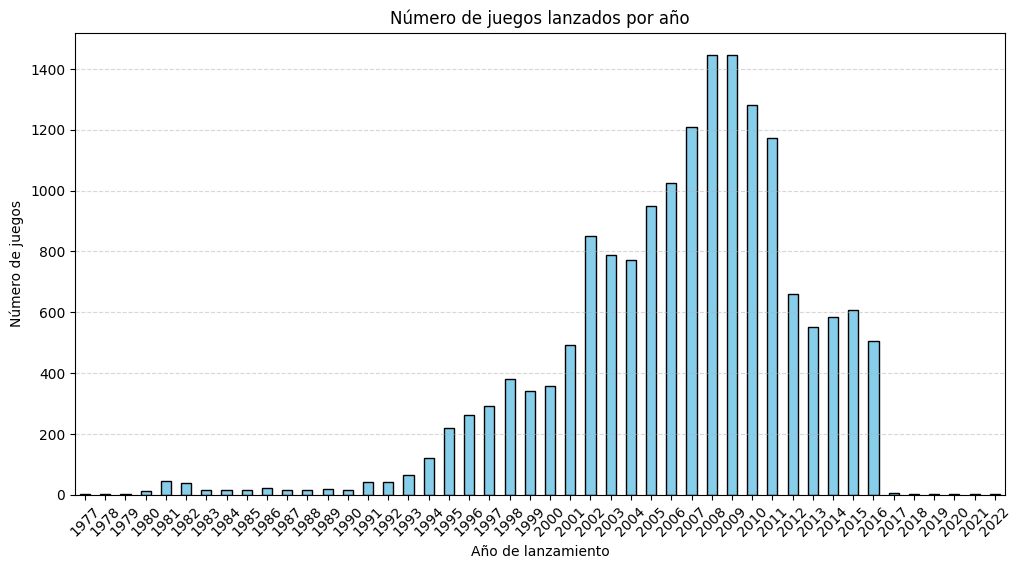

In [ ]:
plt.figure(figsize=(12, 6))
games_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Número de juegos")
plt.title("Número de juegos lanzados por año")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**VENTAS POR PLATAFORMA**

In [27]:
platform_sales = df.groupby("platform")["total_sales"].sum().sort_values(ascending=False)

print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


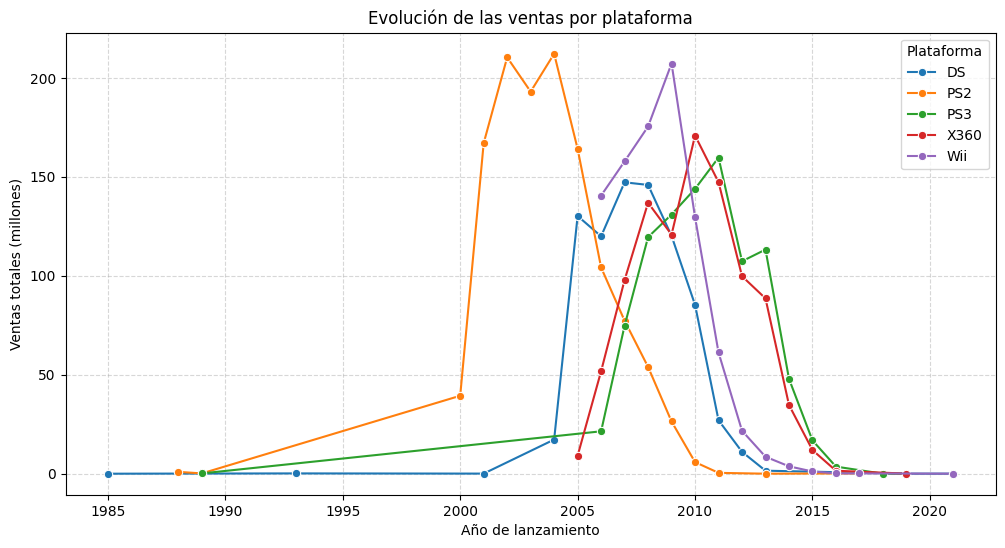

In [ ]:
#Solo las 5 
top_platforms = platform_sales.head(5).index  


df_top_platforms = df[df["platform"].isin(top_platforms)]

# Agrupacion ventas por año y plataforma
sales_by_year_platform = df_top_platforms.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_platform, x="year_of_release", y="total_sales", hue="platform", marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones)")
plt.title("Evolución de las ventas por plataforma")
plt.legend(title="Plataforma")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# Encontrar el primer y último año con ventas registradas por plataforma
platform_lifecycle = df.groupby("platform")["year_of_release"].agg(["min", "max"])

# Calculo de la duración de cada plataforma
platform_lifecycle["lifespan"] = platform_lifecycle["max"] - platform_lifecycle["min"]

# Ordenar: duración de vida
platform_lifecycle = platform_lifecycle.sort_values(by="lifespan", ascending=False)

# Mostrar las plataformas que desaparecieron (sin ventas recientes)
print(platform_lifecycle.tail(10))  # Últimas 10 plataformas en el ranking

           min   max  lifespan
platform                      
WiiU      2012  2016         4
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
GG        1992  1992         0
PCFX      1996  1996         0
TG16      1995  1995         0


In [30]:
avg_lifespan = platform_lifecycle["lifespan"].mean()

print(f"La duración promedio de una plataforma es de aproximadamente {avg_lifespan:.1f} años.")

La duración promedio de una plataforma es de aproximadamente 12.3 años.


**PERIODO DE TOMA DE DATOS (Modelo 2017)**

Para la toma de datos hay que considerar lo siguiente:

La cantidad de juegos por año no es uniforme. Si hay pocos juegos en los primeros años, esos datos pueden ser poco representativos.
Las plataformas tienen un ciclo de vida promedio de aproximadamente 10 años.
Para predecir 2017, lo ideal es incluir datos de plataformas activas en años recientes.
Excluir datos demasiado antiguos (antes del 2000):

In [31]:
df_filtered = df[(df["year_of_release"] >= 2002) & (df["year_of_release"] <= 2016)]
print(df_filtered)

                                name platform  year_of_release       genre  \
0                         Wii Sports      Wii             2006      Sports   
2                     Mario Kart Wii      Wii             2008      Racing   
3                  Wii Sports Resort      Wii             2009      Sports   
6              New Super Mario Bros.       DS             2006    Platform   
7                           Wii Play      Wii             2006        Misc   
...                              ...      ...              ...         ...   
16710  Samurai Warriors: Sanada Maru      PS3             2016      Action   
16711               LMA Manager 2007     X360             2006      Sports   
16712        Haitaka no Psychedelica      PSV             2016   Adventure   
16713               Spirits & Spells      GBA             2003    Platform   
16714            Winning Post 8 2016      PSV             2016  Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score 

**Plataformas con mayores ventas totales**

In [32]:
platform_sales = df_filtered.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
print(platform_sales.head(10))

platform
PS2     1048.04
X360     971.37
PS3      939.45
Wii      907.32
DS       805.78
PS4      314.14
PSP      294.03
3DS      258.98
GBA      253.60
XB       232.77
Name: total_sales, dtype: float64


**Plataformas a lo largo del tiempo**

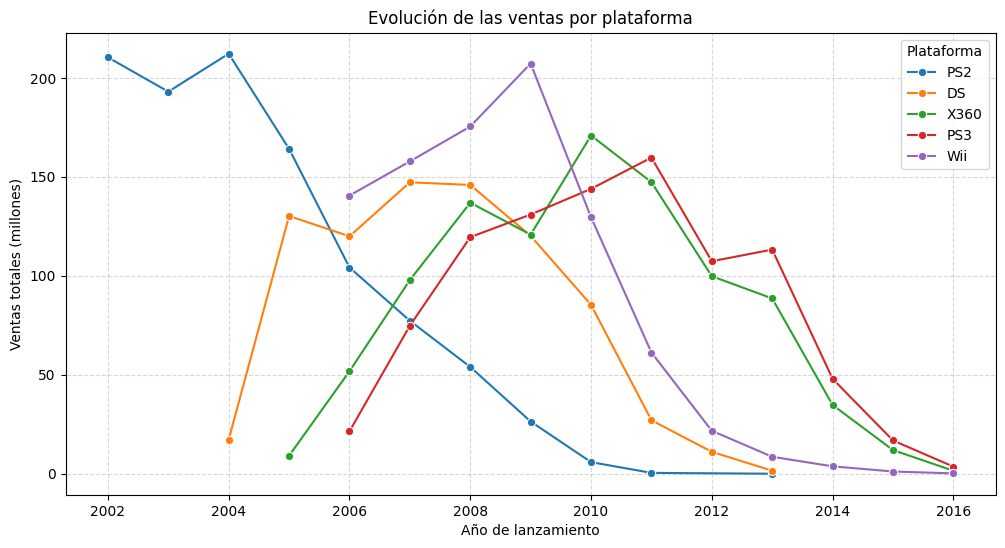

In [ ]:
# Plataformas con mayores ventas
top_platforms = platform_sales.head(5).index

# Filtrar datos solo para esas plataformas
df_top_platforms = df_filtered[df_filtered["platform"].isin(top_platforms)]

# Agrupar ventas por año y plataforma
sales_by_year_platform = df_top_platforms.groupby(["year_of_release", "platform"])["total_sales"].sum().reset_index()

# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_platform, x="year_of_release", y="total_sales", hue="platform", marker="o")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones)")
plt.title("Evolución de las ventas por plataforma")
plt.legend(title="Plataforma")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

**Plataformas en crecimiento y declive**

In [ ]:
# Encontar el año de pico de ventas para cada plataforma
peak_year = df_filtered.groupby("platform")["year_of_release"].max()

# Encontrar la última vez que cada plataforma tuvo ventas significativas (al menos 1 millón)
recent_sales = df_filtered[df_filtered["total_sales"] > 1].groupby("platform")["year_of_release"].max()

# Comparar con el período de análisis (2002-2016)
active_platforms = recent_sales[recent_sales >= 2014].index  # Plataformas con ventas recientes
declining_platforms = recent_sales[recent_sales < 2014].index  # Plataformas con ventas en declive
print("Plataformas en crecimiento:", list(active_platforms))
print("Plataformas en declive:", list(declining_platforms))

Plataformas en crecimiento: ['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
Plataformas en declive: ['DS', 'GBA', 'GC', 'PS', 'PS2', 'PSP', 'XB']


**Ventas globales**

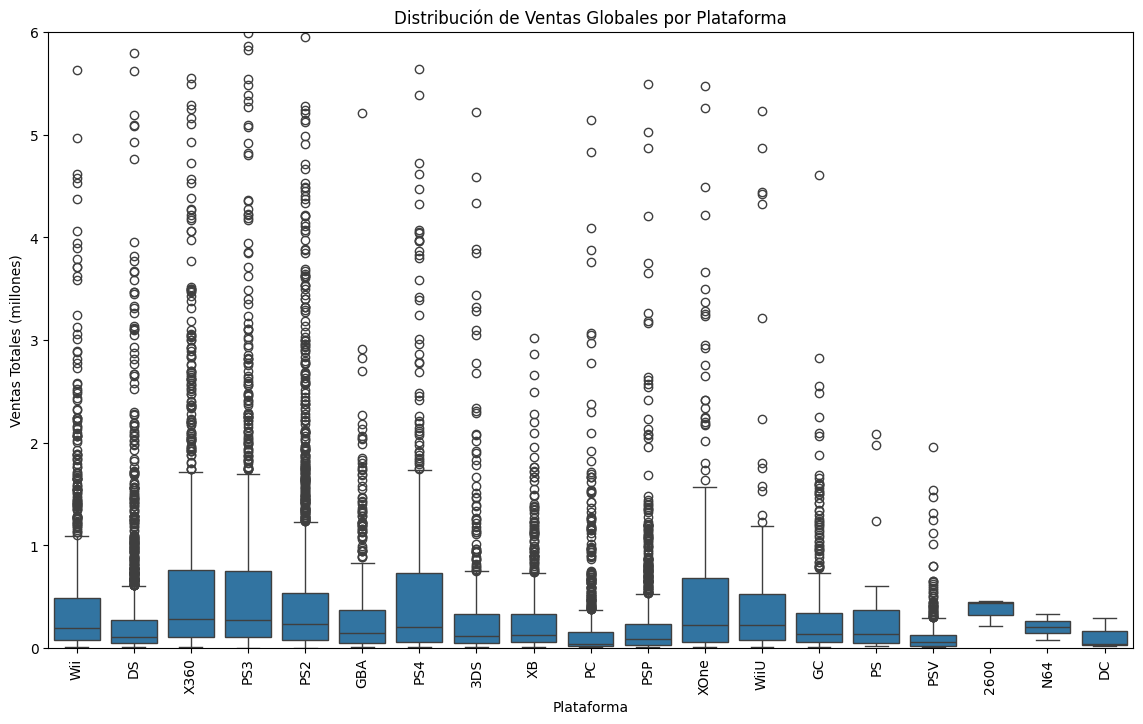

In [ ]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(14, 8))

# Crear el boxplot con límite en el eje Y
sns.boxplot(data=df_filtered, x="platform", y="total_sales")
plt.xticks(rotation=90)

plt.title("Distribución de Ventas Globales por Plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (millones)")

# Ajustar el rango del eje Y a 0 - 40 millones
plt.ylim(0, 6)

plt.show()

**Reseñas y ventas en PS4**

In [ ]:
#FILTRADO DE LA PLATAFORMA
df_ps4 = df_filtered[df_filtered["platform"] == "PS4"].copy()

# Convercion de "user_score" a numérico (cambiar "tbd" a NaN y convertir a float)
df_ps4["user_score"] = pd.to_numeric(df_ps4["user_score"], errors="coerce")

# Eliminacion filas con valores NaN en las columnas relevantes
df_ps4 = df_ps4.dropna(subset=["critic_score", "user_score", "total_sales"])

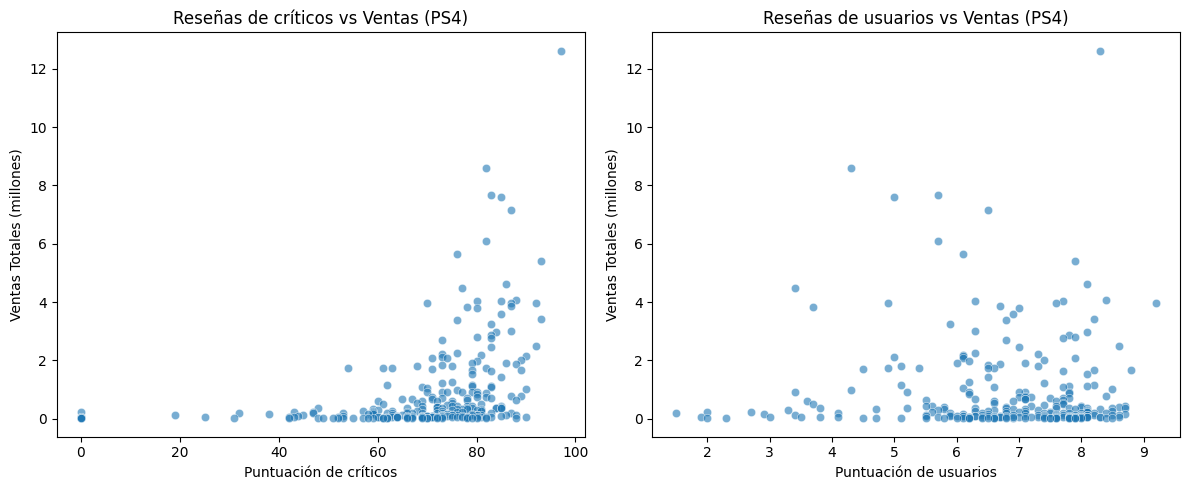

In [ ]:
# Gráfico de dispersión: Reseñas de críticos vs Ventas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4, x="critic_score", y="total_sales", alpha=0.6)
plt.xlabel("Puntuación de críticos")
plt.ylabel("Ventas Totales (millones)")
plt.title("Reseñas de críticos vs Ventas (PS4)")

# Gráfico de dispersión: Reseñas de usuarios vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4, x="user_score", y="total_sales", alpha=0.6)
plt.xlabel("Puntuación de usuarios")
plt.ylabel("Ventas Totales (millones)")
plt.title("Reseñas de usuarios vs Ventas (PS4)")

plt.tight_layout()
plt.show()

In [ ]:
#Correlaciones
correlation_critic = df_ps4["critic_score"].corr(df_ps4["total_sales"])
correlation_user = df_ps4["user_score"].corr(df_ps4["total_sales"])

print(f"Correlación entre críticas profesionales y ventas: {correlation_critic:.2f}")
print(f"Correlación entre críticas de usuarios y ventas: {correlation_user:.2f}")

Correlación entre críticas profesionales y ventas: 0.36
Correlación entre críticas de usuarios y ventas: -0.03


Correlación entre críticas profesionales y ventas: 0.36


Esto sugiere una relación positiva débil entre las críticas profesionales y las ventas. Es decir, en general, los juegos con mejores críticas profesionales tienden a tener mayores ventas, aunque la relación no es muy fuerte. Hay otros factores que también influyen en las ventas, además de las críticas.


Correlación entre críticas de usuarios y ventas: -0.03


Esta correlación negativa muy baja sugiere que las críticas de los usuarios no tienen un impacto significativo en las ventas. De hecho, parece que no existe una relación clara entre las reseñas de los usuarios y las ventas de los juegos, o cualquier tendencia en este sentido es demasiado débil para ser significativa.

**Comparacion de ventas de los mismos juegos en otras plataformas**

In [39]:
common_games = df_filtered.groupby("name").filter(lambda x: len(x) > 1)

# Mostrar los juegos comunes entre plataformas
common_games_list = common_games["name"].unique()
print(f"Juegos comunes entre plataformas: {common_games_list}")

Juegos comunes entre plataformas: ['Grand Theft Auto V' 'Grand Theft Auto: San Andreas'
 'Grand Theft Auto: Vice City' ... 'Sakura-Sou no Pet na Kanojo'
 'Heart no Kuni no Alice' 'Akatsuki no Goei Trinity']


In [ ]:
platform_sales_comparison = common_games.groupby(["name", "platform"])["total_sales"].sum().reset_index()

#RESULTADO
platform_sales_comparison.head()

,name,platform,total_sales
0,Frozen: Olaf's Quest,3DS,0.59
1,Frozen: Olaf's Quest,DS,0.51
2,007: Quantum of Solace,DS,0.13
3,007: Quantum of Solace,PC,0.02
4,007: Quantum of Solace,PS2,0.43


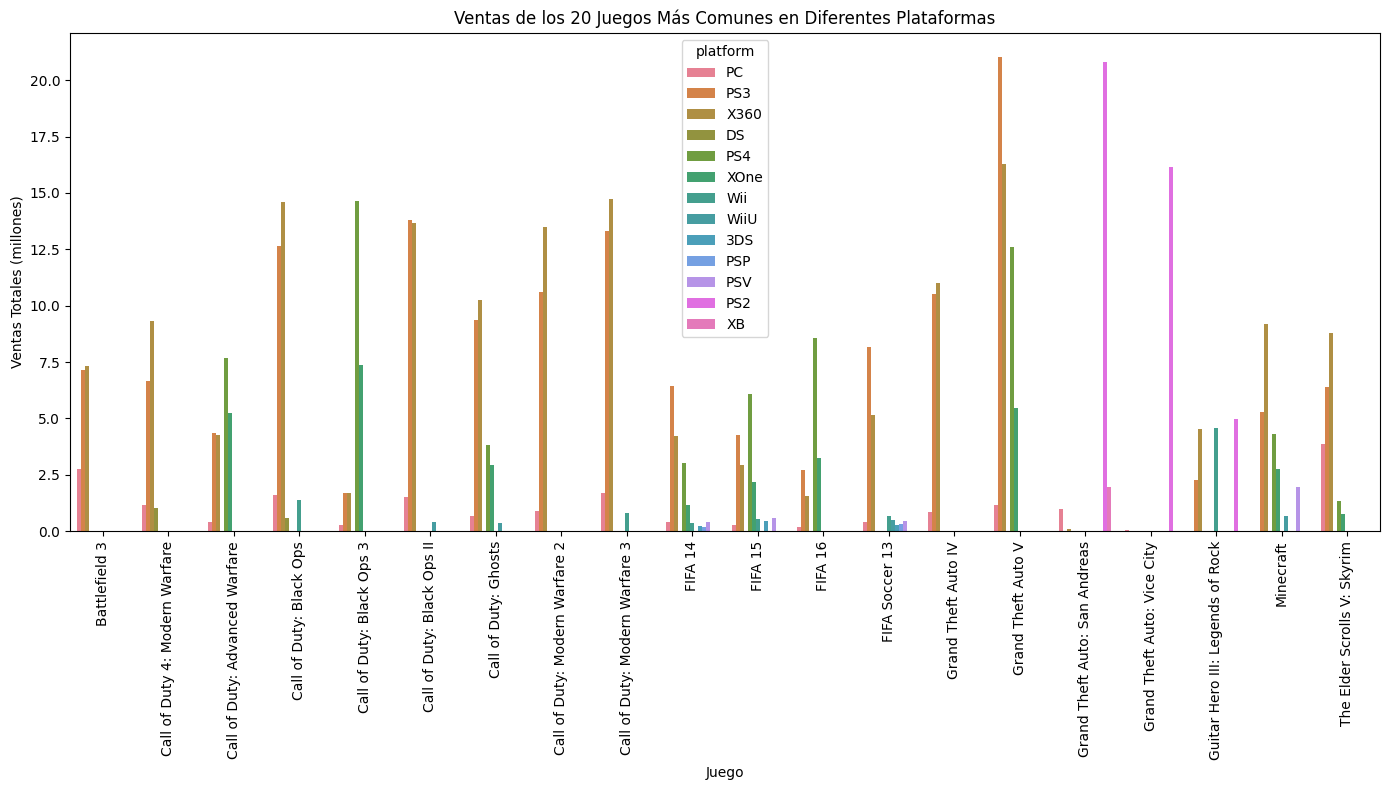

In [ ]:
# Filtrar los 20 juegos más comunes por plataforma
top_20_games = platform_sales_comparison.groupby("name")["total_sales"].sum().sort_values(ascending=False).head(20).index

# Filtrar los datos para solo incluir los 20 juegos más comunes
top_20_sales_comparison = platform_sales_comparison[platform_sales_comparison["name"].isin(top_20_games)]

#Gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(data=top_20_sales_comparison, x="name", y="total_sales", hue="platform")

plt.xticks(rotation=90)

# Título y etiquetas
plt.title("Ventas de los 20 Juegos Más Comunes en Diferentes Plataformas")
plt.xlabel("Juego")
plt.ylabel("Ventas Totales (millones)")


plt.tight_layout()
plt.show()

**Distribucion  por género**

In [ ]:
# Contar cuántos juegos hay en cada género
games_per_genre = df_filtered["genre"].value_counts()

print(games_per_genre)

genre
Action          3019
Sports          1836
Misc            1575
Role-Playing    1244
Adventure       1162
Shooter         1098
Racing           936
Simulation       740
Platform         660
Fighting         599
Strategy         522
Puzzle           460
Name: count, dtype: int64


In [ ]:
sales_per_genre = df_filtered.groupby("genre")["total_sales"].sum().sort_values(ascending=False)


print(sales_per_genre)

genre
Action          1456.67
Sports          1056.66
Shooter          888.64
Misc             696.43
Role-Playing     683.13
Racing           489.10
Platform         440.06
Simulation       314.12
Fighting         277.47
Adventure        171.98
Puzzle           128.22
Strategy         100.62
Name: total_sales, dtype: float64


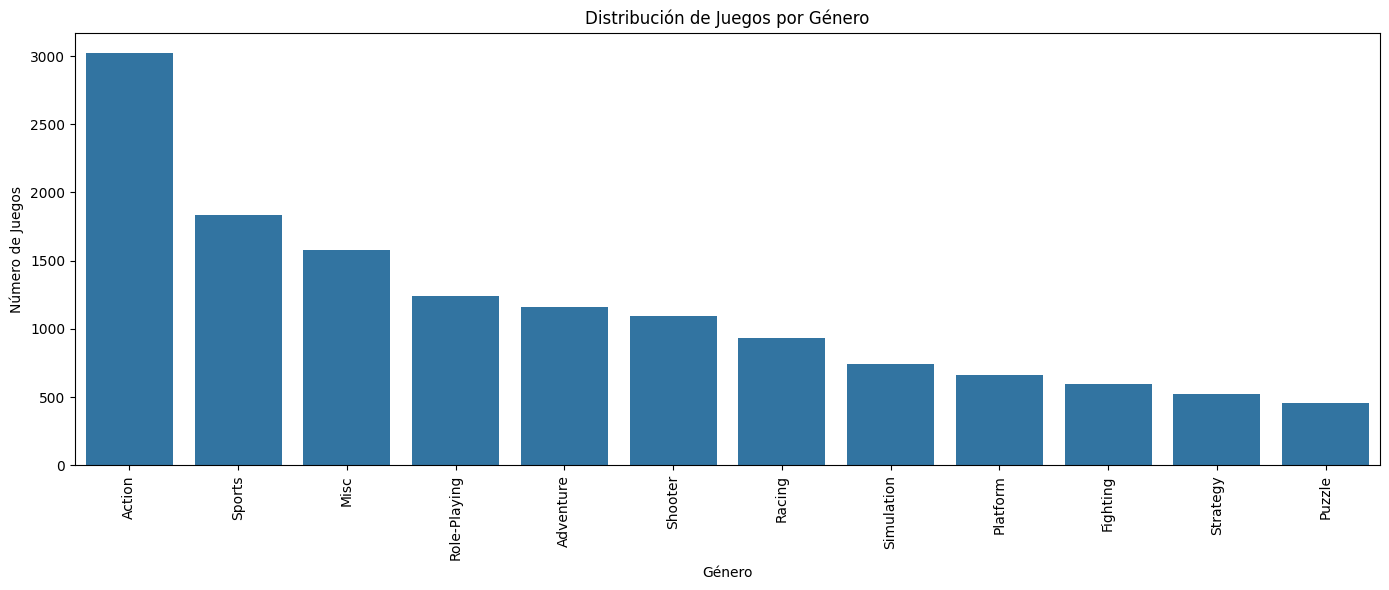

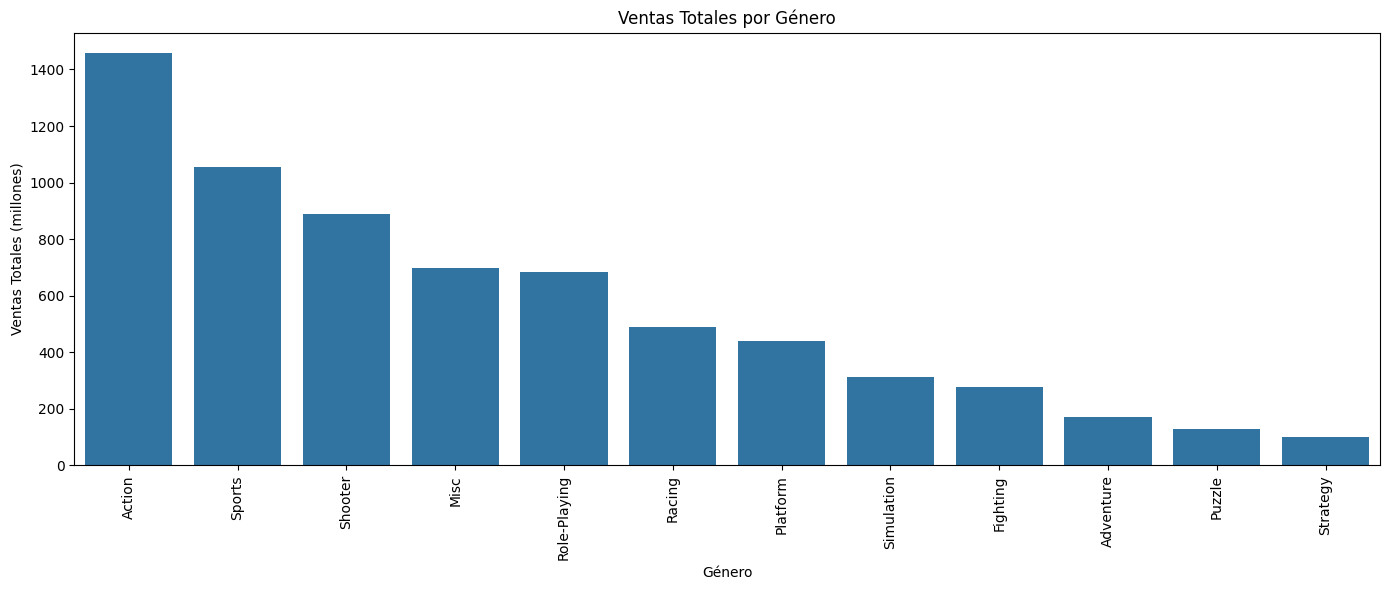

In [44]:
# Gráfico de barras para la cantidad de juegos por género
plt.figure(figsize=(14, 6))
sns.barplot(x=games_per_genre.index, y=games_per_genre.values)
plt.xticks(rotation=90)
plt.title("Distribución de Juegos por Género")
plt.xlabel("Género")
plt.ylabel("Número de Juegos")
plt.tight_layout()
plt.show()

# Gráfico de barras para las ventas totales por género
plt.figure(figsize=(14, 6))
sns.barplot(x=sales_per_genre.index, y=sales_per_genre.values)
plt.xticks(rotation=90)
plt.title("Ventas Totales por Género")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.tight_layout()
plt.show()

Los géneros más populares como Acción y Deporte tienden a generar mayores ventas, mientras que los géneros de nicho como Simuladores o RPGs generalmente tienen un volumen de ventas menor pero pueden ser igualmente rentables por la lealtad de su comunidad.

### Perfil de usuario para cada región

 **Plataformas principales**

In [ ]:
# Obtener las 5 plataformas principales en cada región
top_na = df.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_eu = df.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_jp = df.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

# Resultados
print("Top 5 plataformas en Norteamérica:")
print(top_na)
print("\nTop 5 plataformas en Europa:")
print(top_eu)
print("\nTop 5 plataformas en Japón:")
print(top_jp)

Top 5 plataformas en Norteamérica:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Europa:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


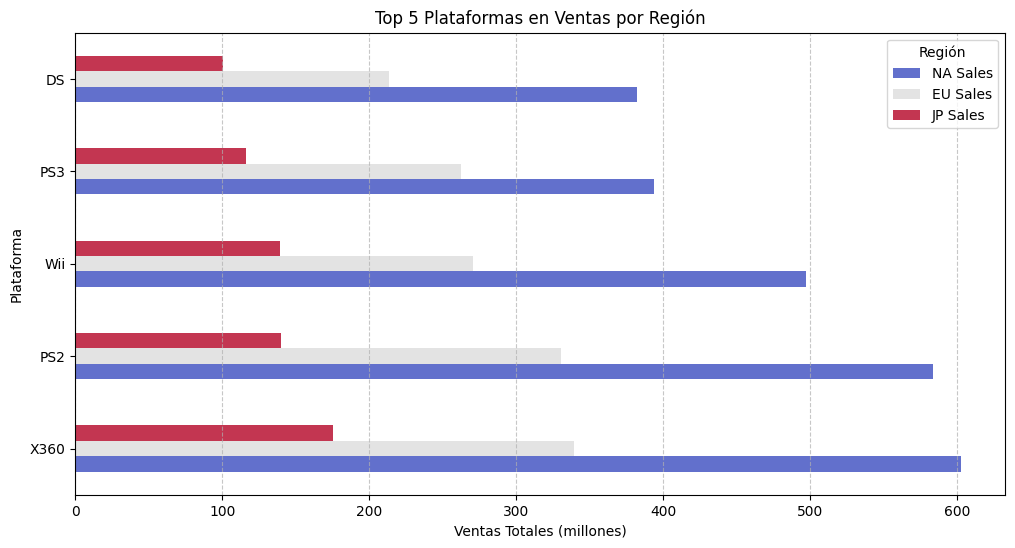

In [ ]:
# DataFrame con las cinco plataformas principales en cada región
top_platforms = pd.DataFrame({
    "Plataforma": top_na.index,
    "NA Sales": top_na.values,
    "EU Sales": top_eu.values,
    "JP Sales": top_jp.values
}).set_index("Plataforma")

# Gráfico de barras horizontales
top_platforms.plot(kind="barh", figsize=(12, 6), colormap="coolwarm", alpha=0.8)

# Etiquetas y título
plt.title("Top 5 Plataformas en Ventas por Región")
plt.xlabel("Ventas Totales (millones)")
plt.ylabel("Plataforma")
plt.legend(title="Región")
plt.grid(axis="x", linestyle="--", alpha=0.7)


plt.show()

Xbox tiene un gran mercado en Norteamérica, pero casi no existe en Japón.

PlayStation es fuerte en Europa y Japón, pero su dominio varía por región.

Nintendo es extremadamente popular en Japón, pero también tiene presencia en NA y UE.

El mercado japonés es muy distinto a NA y UE, con una gran preferencia por consolas portátile


**Géneros principales por ventas**

In [ ]:
# Agrupacion por género y suma de las ventas en cada región
top_na = df.groupby("genre")["na_sales"].sum().sort_values(ascending=False).head(5)
top_eu = df.groupby("genre")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_jp = df.groupby("genre")["jp_sales"].sum().sort_values(ascending=False).head(5)

#Resultados
print("Top 5 géneros en América del Norte:")
print(top_na)

print("\nTop 5 géneros en Europa:")
print(top_eu)

print("\nTop 5 géneros en Japón:")
print(top_jp)

Top 5 géneros en América del Norte:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en Europa:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en Japón:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


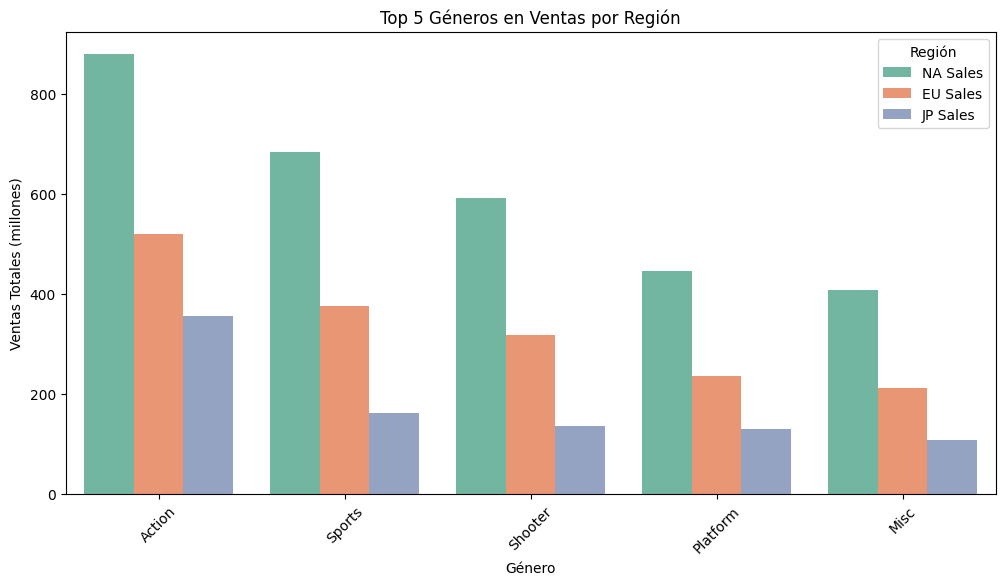

In [ ]:
# Crear un DataFrame con los datos de los 5 géneros principales en cada región
top_genres = pd.DataFrame({
    "Género": top_na.index,
    "NA Sales": top_na.values,
    "EU Sales": top_eu.values,
    "JP Sales": top_jp.values
})

# Transformar a formato largo para seaborn
top_genres_melted = top_genres.melt(id_vars="Género", var_name="Región", value_name="Ventas")

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_melted, x="Género", y="Ventas", hue="Región", palette="Set2")

# Título y etiquetas
plt.title("Top 5 Géneros en Ventas por Región")
plt.xlabel("Género")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Región")
plt.xticks(rotation=45)

plt.show()

NA y EU tienen tendencias similares, con más ventas en Acción, Shooter y Deportes.

Japón es diferente, con un enfoque en RPG y Aventura, y muy bajas ventas de shooters y deportes.

Las diferencias culturales afectan las preferencias de los jugadores en cada región

**Clasificaciones de ESRB**

In [ ]:
# Agrupacion por clasificación ESRB y suma de las ventas en cada región
esrb_sales = df.groupby("rating")[["na_sales", "eu_sales", "jp_sales"]].sum()

# Ordenar por ventas totales en NA
esrb_sales = esrb_sales.sort_values(by="na_sales", ascending=False)

print(esrb_sales)

        na_sales  eu_sales  jp_sales
rating                              
E        1292.99    710.25    198.11
T         759.75    427.03    151.40
M         748.48    483.97     64.24
E10+      353.32    188.52     40.20
K-A         2.56      0.27      1.46
EC          1.53      0.11      0.00
AO          1.26      0.61      0.00
RP          0.00      0.08      0.00


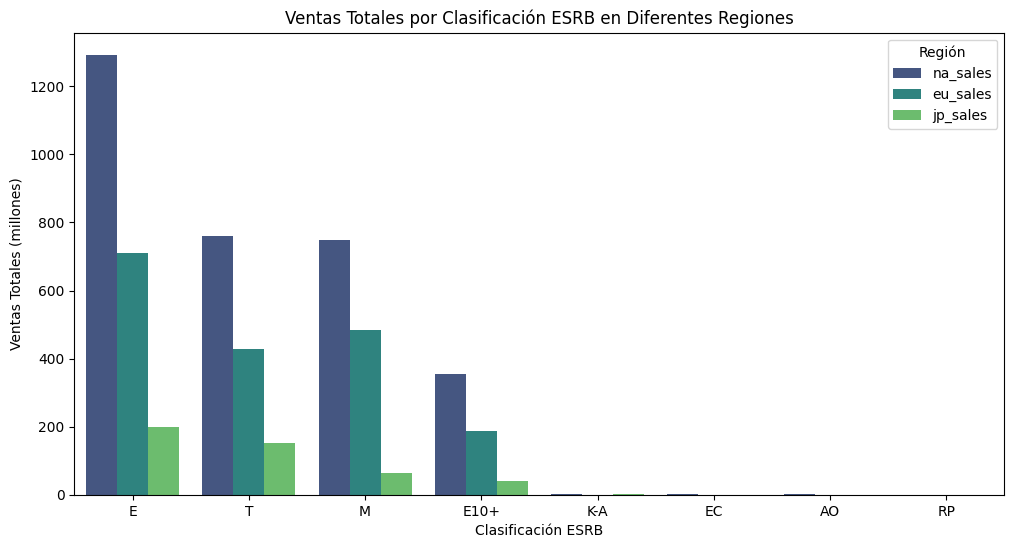

In [ ]:
# Transformar los datos para seaborn
esrb_sales_melted = esrb_sales.reset_index().melt(id_vars="rating", var_name="Región", value_name="Ventas")

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.barplot(data=esrb_sales_melted, x="rating", y="Ventas", hue="Región", palette="viridis")

# Título y etiquetas
plt.title("Ventas Totales por Clasificación ESRB en Diferentes Regiones")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas Totales (millones)")
plt.legend(title="Región")

plt.show()

**América del Norte (NA)**

Las clasificaciones "E" (Everyone) y "M" (Mature) tienen las ventas más altas.
Explicación: Juegos familiares como Mario venden bien, pero los FPS y juegos de acción con clasificación "M" (Call of Duty, GTA) también dominan.

**Europa (EU)**

Tendencias similares a NA, con altos valores en "E" y "M".
"T" (Teen) también tiene buenas ventas, lo que indica preferencia por juegos accesibles para adolescentes.


**Japón (JP)**

Las clasificaciones de ESRB tienen poco impacto, ya que Japón usa su propio sistema de clasificación (CERO).
Ventas más equilibradas entre clasificaciones, con mayor presencia de juegos "E" y "T".
Menor proporción de juegos "M", ya que los shooters no son tan populares en Japón.

## Probando hipótesis:



**Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.**

H₀ (Hipótesis nula): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

H₁ (Hipótesis alternativa): Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

In [ ]:
# Crear copias temporales para la prueba sin modificar el DataFrame original
xbox_one_scores = pd.to_numeric(df[df["platform"] == "XOne"]["user_score"], errors="coerce").dropna()
pc_scores = pd.to_numeric(df[df["platform"] == "PC"]["user_score"], errors="coerce").dropna()

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para decir que las calificaciones promedio sean diferentes.")

Estadístico t: -4.65
Valor p: 0.0000
Rechazamos la hipótesis nula: Las calificaciones promedio son diferentes.


Se aplicó una prueba t de Student para muestras independientes (ttest_ind), ya que:

Comparamos dos grupos independientes (Xbox One vs. PC).

Las calificaciones de usuarios son datos numéricos y aproximadamente continuos.

Las varianzas pueden ser diferentes, por lo que usamos equal_var=False (prueba t de Welch).

Se eliminan los valores "tbd" porque no representan datos numéricos.

Se establecio alpha = 0.05

**Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.**

H₀ (Hipótesis nula): No hay diferencia significativa en las calificaciones promedio de los usuarios entre los géneros Acción y Deportes.

H₁ (Hipótesis alternativa): Las calificaciones promedio de los usuarios son diferentes entre ambos géneros.

In [ ]:
# Crear copias temporales de los datos solo para la prueba
accion_scores = pd.to_numeric(df[df["genre"] == "Action"]["user_score"], errors="coerce").dropna()
deportes_scores = pd.to_numeric(df[df["genre"] == "Sports"]["user_score"], errors="coerce").dropna()

# Prueba t de Student
t_stat, p_value = stats.ttest_ind(accion_scores, deportes_scores, equal_var=False)

# Resultados
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio son significativamente diferentes entre Acción y Deportes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las calificaciones promedio sean diferentes.")


Estadístico t: 1.58
Valor p: 0.1148
No podemos rechazar la hipótesis nula: No hay suficiente evidencia para afirmar que las calificaciones promedio sean diferentes.


Se utilizó la prueba t de Student para muestras independientes (ttest_ind) porque:

Comparamos dos grupos independientes (Acción vs. Deportes).

Las calificaciones de usuarios son una variable cuantitativa y aproximadamente continua.

Las muestras pueden no tener la misma varianza, por lo que usamos equal_var=False (prueba t de Welch).

Se eliminan los valores "tbd", ya que no representan datos numéricos.

El criterio de decisión es: alpha = 0.05

## Conclusión General del Proyecto

Este análisis de datos sobre la industria de los videojuegos permitió obtener información valiosa sobre las tendencias del mercado, las plataformas más exitosas y la influencia de factores como la crítica profesional y la calificación de los usuarios en las ventas.

Entre los hallazgos más relevantes se destacan:

* Tendencias de ventas y plataformas líderes: Se identificó que plataformas como PS2, PS4 y X360 han dominado el mercado en distintos períodos, mientras que otras, como PS5 y Xbox Series X, apenas comienzan a consolidarse. Además, se observó que las plataformas suelen tardar entre 5 y 10 años en desaparecer después de alcanzar su punto máximo de ventas.

* Géneros más rentables: Se encontró que los juegos de Acción y Deportes lideran las ventas globales, mientras que géneros como Aventura y Estrategia tienen un público más de nicho.

* Diferencias regionales: El análisis por regiones (Norteamérica, Europa y Japón) reveló que las preferencias varían considerablemente. En Japón, por ejemplo, los juegos de Rol tienen una mayor cuota de mercado en comparación con NA y EU, donde dominan los juegos de Acción y Deportes.

* Impacto de la clasificación ESRB: Se observó que en NA y EU los juegos con clasificación M (Mature) y E (Everyone) tienen las mayores ventas, mientras que en JP la clasificación ESRB no tiene tanto impacto debido a sus propios sistemas de calificación.

* Pruebas de hipótesis: Se realizaron pruebas estadísticas para determinar si las calificaciones de usuarios variaban según plataforma y género. No se encontró una diferencia significativa entre Xbox One y PC, pero sí entre los géneros de Acción y Deportes, lo que indica que ciertos géneros pueden generar percepciones distintas en los jugadores.